# XIV.10.1 a) 
# Схема Лакса

In [46]:
import numpy as np
import math
import matplotlib.pyplot as plt
import copy

In [47]:
T = 9
L = 10

def u0(x):
    return math.sin(2 * math.pi * x / L); # заполнить в начале вне всех функций
    
def Lux(y, k_num, Nt, Nx):
    for n in range(1, Nt + 1):
        for m in range(1, Nx):
            y[n][m] = 1 / 2 * y[n - 1][m + 1] * (1 - k_num) + 1 / 2 * y[n - 1][m - 1] * (1 + k_num)
        y[n][0] = 1 / 2 * y[n - 1][1] * (1 - k_num) + 1 / 2 * y[n - 1][Nx - 1] * (1 + k_num)
        y[n][Nx] = 1 / 2 * y[n - 1][1] * (1 - k_num) + 1 / 2 * y[n - 1][Nx - 1] * (1 + k_num)

Text(0, 0.5, 'u(x) for t = T')

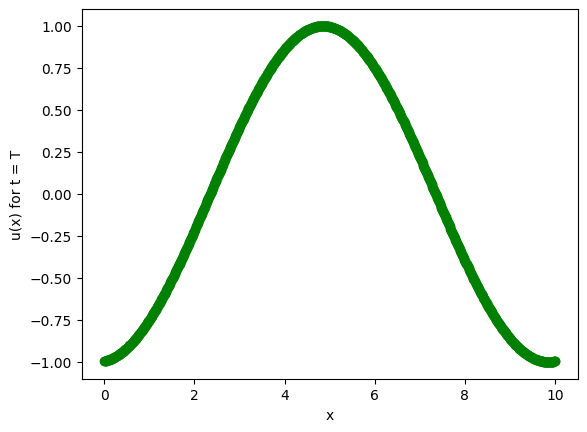

In [48]:
t = 1e-2
h = 1e-2
k_num = t / h
Nx = int (L / h)
Nt = int (T / t)
y = np.array([[0.0 for i in range(Nx + 1)] for i in range(Nt + 1)])
for i in range(0, Nx + 1):
    y[0][i] = u0(i * h)

Lux(y, k_num, Nt, Nx)

x = np.array([i * h for i in range(0, Nx + 1)])
plt.plot(x, y[Nt // 4 + 10], 'go', linestyle = '--')
plt.xlabel("x")
plt.ylabel("u(x) for t = T")

Text(0, 0.5, 'u(x, t) for t = T')

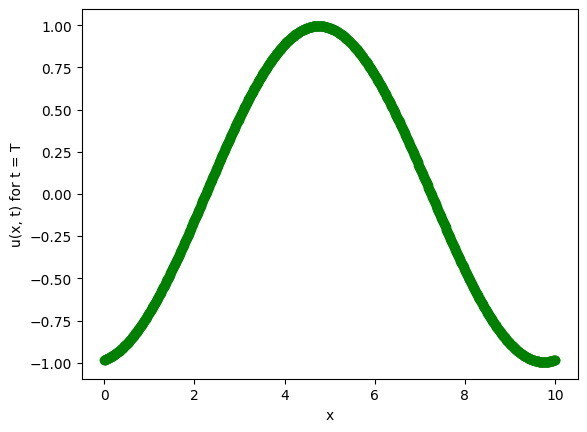

In [49]:
t = 0.6 * 1e-2
h = 1e-2
k_num = t / h
Nx = int (L / h)
Nt = int (T / t)
y = np.array([[0.0 for i in range(Nx + 1)] for i in range(Nt + 1)])
for i in range(0, Nx + 1):
    y[0][i] = u0(i * h)

Lux(y, k_num, Nt, Nx)

x = np.array([i * h for i in range(0, Nx + 1)])
plt.plot(x, y[Nt // 4], 'go', linestyle = '--')
plt.xlabel("x")
plt.ylabel("u(x, t) for t = T")

Text(0, 0.5, 'u(x) for t = T')

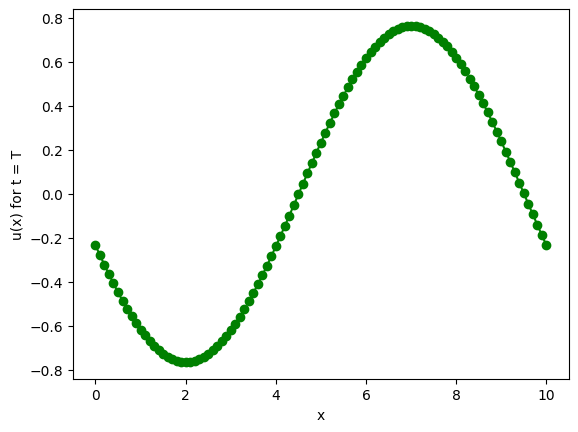

In [50]:
t = 0.3 * 1e-2 * 10
h = 1e-2 * 10
k_num = t / h
Nx = int (L / h)
Nt = int (T / t)
y = np.array([[0.0 for i in range(Nx + 1)] for i in range(Nt + 1)])
for i in range(0, Nx + 1):
    y[0][i] = u0(i * h)

Lux(y, k_num, Nt, Nx)

x = np.array([i * h for i in range(0, Nx + 1)])
plt.plot(x, y[Nt // 2], 'go', linestyle = '--')
plt.xlabel("x")
plt.ylabel("u(x) for t = T")

0.17262537325158822


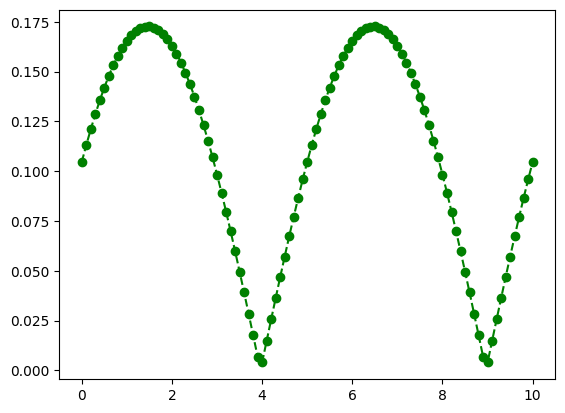

In [77]:
t = 0.6 * 10 * 1e-2
h = 10 * 1e-2
k_num = t / h
Nx = int (L / h)
Nt = int (T / t)
y1 = np.array([[0.0 for j in range(Nx + 1)] for i in range(Nt + 1)])
err = np.array([[0.0 for j in range(Nx + 1)] for i in range(Nt + 1)])

for j in range(0, Nx + 1):
    y1[0][j] = u0(j * h)
    
Lux(y1, k_num, Nt, Nx)

for i in range(0, Nt + 1):
    for j in range(0, Nx + 1):
        err[i][j] = abs(y1[i][j] - u0(j * h - i * t))
    
Lux_Wendroff(y1, k_num, Nt, Nx)

print(np.amax(err))
x = np.array([i * h for i in range(0, Nx + 1)])
plt.plot(x, err[Nt], 'go', linestyle = '--')

In [ ]:
0.1 -> 0.05 -> 0.02 ~dx

# Схема Лакса-Вендроффа
# XIV.10.1 б)

In [51]:
def Lux_Wendroff(y, k_num, Nt, Nx):
    for n in range(1, Nt + 1):
        for m in range(1, Nx):
            y[n][m] = k_num * (k_num - 1) * y[n - 1][m + 1] * 1 / 2 + (1 - k_num ** 2) * y[n - 1][m] + k_num * (k_num + 1) * y[n - 1][m - 1] * 1 / 2
        y[n][0] = k_num * (k_num - 1) * y[n - 1][1] * 1 / 2 + (1 - k_num ** 2) * y[n - 1][0] + k_num * (k_num + 1) * y[n - 1][Nx - 1] * 1 / 2
        y[n][Nx] = k_num * (k_num - 1) * y[n - 1][1] * 1 / 2 + (1 - k_num ** 2) * y[n - 1][Nx] + k_num * (k_num + 1) * y[n - 1][Nx - 1] * 1 / 2

Text(0, 0.5, 'u(x) for t = T')

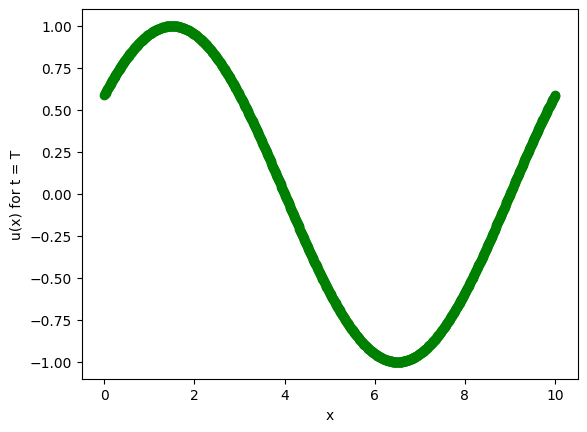

In [52]:
t = 1e-2
h = 1e-2
k_num = t / h
Nx = int (L / h)
Nt = int (T / t)
y = np.array([[0.0 for i in range(Nx + 1)] for i in range(Nt + 1)])
for i in range(0, Nx + 1):
    y[0][i] = u0(i * h)

Lux_Wendroff(y, k_num, Nt, Nx)

x = np.array([i * h for i in range(0, Nx + 1)])
plt.plot(x, y[Nt], 'go', linestyle = '--')
plt.xlabel("x")
plt.ylabel("u(x) for t = T")

Text(0, 0.5, 'u(x) for t = T')

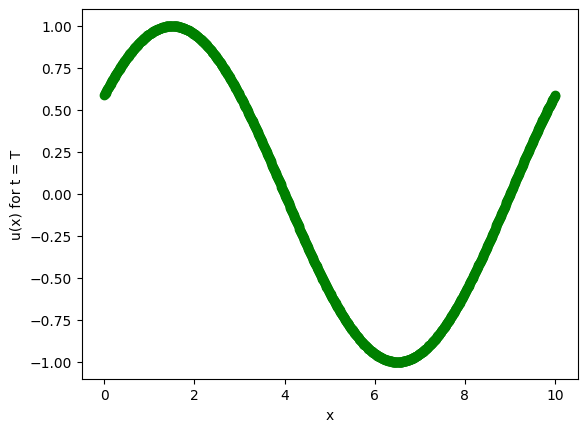

In [53]:
t = 0.6 * 1e-2
h = 1e-2
k_num = t / h
Nx = int (L / h)
Nt = int (T / t)
y = np.array([[0.0 for i in range(Nx + 1)] for i in range(Nt + 1)])
for i in range(0, Nx + 1):
    y[0][i] = u0(i * h)

Lux_Wendroff(y, k_num, Nt, Nx)

x = np.array([i * h for i in range(0, Nx + 1)])
plt.plot(x, y[Nt], 'go', linestyle = '--')
plt.xlabel("x")
plt.ylabel("u(x) for t = T")

Text(0, 0.5, 'u(x) for t = T')

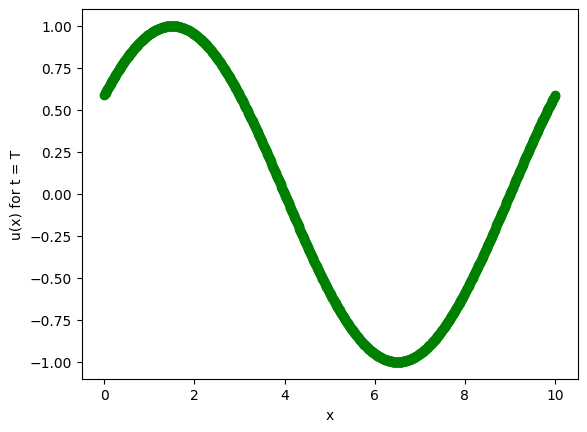

In [54]:
t = 0.3 * 1e-2
h = 1e-2
k_num = t / h
Nx = int (L / h)
Nt = int (T / t)
y = np.array([[0.0 for i in range(Nx + 1)] for i in range(Nt + 1)])
for i in range(0, Nx + 1):
    y[0][i] = u0(i * h)

Lux_Wendroff(y, k_num, Nt, Nx)

x = np.array([i * h for i in range(0, Nx + 1)])
plt.plot(x, y[Nt], 'go', linestyle = '--')
plt.xlabel("x")
plt.ylabel("u(x) for t = T")

Оценим реальный порядок сходимости схемы Лакса-Вендроффа

0.002379635773882692


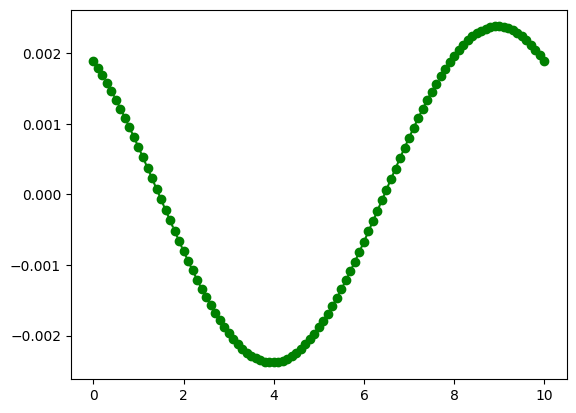

In [66]:
t = 6 * 1e-2
h = 10 * 1e-2
k_num = t / h
Nx = int (L / h)
Nt = int (T / t)
y1 = np.array([[0.0 for j in range(Nx + 1)] for i in range(Nt + 1)])
err = np.array([[0.0 for j in range(Nx + 1)] for i in range(Nt + 1)])

for j in range(0, Nx + 1):
    y1[0][j] = u0(j * h)
    
Lux_Wendroff(y1, k_num, Nt, Nx)

for i in range(0, Nt + 1):
    for j in range(0, Nx + 1):
        err[i][j] = y1[i][j] - u0(j * h - i * t)
    
Lux_Wendroff(y1, k_num, Nt, Nx)

print(np.amax(err))
x = np.array([i * h for i in range(0, Nx + 1)])
plt.plot(x, err[Nt], 'go', linestyle = '--')

0.00014882416917472423


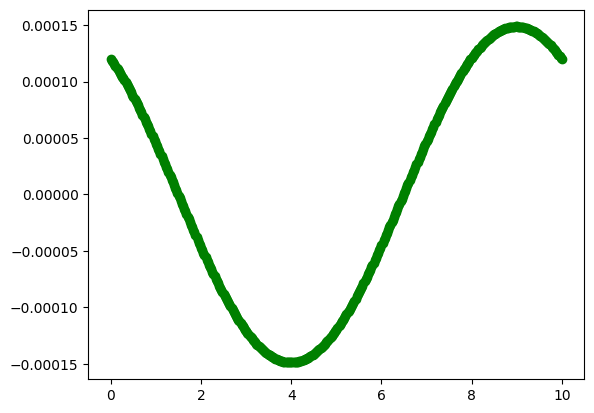

In [70]:
t = 0.6 * 2.5 * 1e-2
h = 2.5e-2
k_num = t / h
Nx = int (L / h)
Nt = int (T / t)
y1 = np.array([[0.0 for j in range(Nx + 1)] for i in range(Nt + 1)])
err = np.array([[0.0 for j in range(Nx + 1)] for i in range(Nt + 1)])

for j in range(0, Nx + 1):
    y1[0][j] = u0(j * h)
    
Lux_Wendroff(y1, k_num, Nt, Nx)

for i in range(0, Nt + 1):
    for j in range(0, Nx + 1):
        err[i][j] = y1[i][j] - u0(j * h - i * t)
    
Lux_Wendroff(y1, k_num, Nt, Nx)

print(np.amax(err))
x = np.array([i * h for i in range(0, Nx + 1)])
plt.plot(x, err[Nt], 'go', linestyle = '--')

0.002 -> 0.0005 ->  0.0001 ~dx^2